In [2]:
#hide
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastbook import *

In [13]:

#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.179437,0.020434,0.008119,01:03


epoch,train_loss,valid_loss,error_rate,time
0,0.060012,0.013864,0.002706,01:21


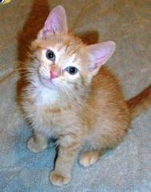

In [16]:
img = PILImage.create(image_cat())
img.to_thumb(192)


In [10]:
#hide_output
uploader = widgets.FileUpload()
uploader


FileUpload(value={}, description='Upload')

In [18]:
#hide
# For the book, we can't actually click an upload button, so we fake it
uploader = SimpleNamespace(data = ['images/chapter1_cat_example.jpg'])

In [19]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999999
